<a href="https://colab.research.google.com/github/silviaaax/datastories_for_emme/blob/main/Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
!python -m spacy download el_core_news_sm

In [5]:
nlp = spacy.load('el_core_news_sm')

In [6]:
news247_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/news247_df_full.csv')
news247_df

site                                                url  \
0    news247.gr  https://www.news247.gr/koinonia/larisa-ti-prag...   
1    news247.gr  https://www.news247.gr/koinonia/telesigrafo-ti...   
2    news247.gr  https://www.news247.gr/koinonia/zakynthos-nea-...   
3    news247.gr  https://www.news247.gr/koinonia/gynaikoktonia-...   
4    news247.gr  https://www.news247.gr/koinonia/larisa-ti-prag...   
..          ...                                                ...   
167  news247.gr  https://www.news247.gr/sunday-edition/gia-ekei...   
168  news247.gr  https://www.news247.gr/koinonia/omofoviki-epit...   
169  news247.gr  https://www.news247.gr/koinonia/chalkidiki-ant...   
170  news247.gr  https://www.news247.gr/koinonia/eglima/gynaiko...   
171  news247.gr  https://www.news247.gr/koinonia/eglima/thessal...   

                                    section  \
0                                  ŒöŒüŒôŒùŒ©ŒùŒôŒë   
1                                  ŒöŒüŒôŒùŒ©ŒùŒôŒë   
2                                  ŒöŒüŒôŒùŒ©ŒùŒôŒë   
3                                  ŒöŒüŒôŒùŒ©ŒùŒôŒë   
4                                  ŒöŒüŒôŒùŒ©ŒùŒôŒë   
..                                      ...   
167                          SUNDAY EDITION   
168                                ŒöŒüŒôŒùŒ©ŒùŒôŒë   
169                                ŒöŒüŒôŒùŒ©ŒùŒôŒë   
170                                 ŒïŒìŒöŒõŒóŒúŒë   
171                                 ŒïŒìŒöŒõŒóŒúŒë   

                                                 title              date  \
0    ŒõŒ¨œÅŒπœÉŒ±: Œ§Œπ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ¨ œÉœÖŒΩŒ≠Œ≤Œ∑ ŒºŒµ œÑŒπœÇ Œ¥œçŒø Œ±ŒºŒ±ŒæŒøœÉ...  2023-06-28 22:12   
1    Œ§ŒµŒªŒµœÉŒØŒ≥œÅŒ±œÜŒø œÑŒ∑œÇ Frontex œÉœÑŒ∑ŒΩ ŒïŒªŒªŒ¨Œ¥Œ±: Œ£œÖŒΩŒµœÅŒ≥Œ±œÉœÑ...  2023-06-28 18:40   
2    ŒñŒ¨Œ∫œÖŒΩŒ∏ŒøœÇ: Œ£œÖŒΩŒµŒªŒÆœÜŒ∏Œ∑ Œ¨ŒΩŒ¥œÅŒ±œÇ Œ≥ŒπŒ± Œ∫Œ±Œ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ œÉŒ∫œçŒª...  2023-06-28 20:48   
3    ŒìœÖŒΩŒ±ŒπŒ∫ŒøŒ∫œÑŒøŒΩŒØŒ± œÉœÑŒ∑ŒΩ Œöœâ: Œ£œÑŒøŒΩ ŒöŒøœÅœÖŒ¥Œ±ŒªŒªœå ŒºŒµœÑŒ±œÜŒ≠œÅŒµ...  2023-06-28 23:27   
4    ŒõŒ¨œÅŒπœÉŒ±: Œ§Œπ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ¨ œÉœÖŒΩŒ≠Œ≤Œ∑ ŒºŒµ œÑŒπœÇ Œ¥œçŒø Œ±ŒºŒ±ŒæŒøœÉ...  2023-06-28 22:12   
..                                                 ...               ...   
167  ŒìŒπŒ± ŒµŒ∫ŒµŒØŒΩŒøœÖœÇ œÄŒøœÖ Œ∏Œ± ŒªŒµŒØœÄŒøœÖŒΩ Œ∫Œ±Œπ œÜŒ≠œÑŒøœÇ Œ±œÄœå œÑŒπœÇ ...  2023-06-24 09:19   
168  ŒüŒºŒøœÜŒøŒ≤ŒπŒ∫ŒÆ ŒµœÄŒØŒ∏ŒµœÉŒ∑ œÉŒµ ŒªŒµœâœÜŒøœÅŒµŒØŒø œÑŒøœÖ ŒüŒëŒ£Œò - "ŒúŒµ ...  2023-06-24 08:59   
169  ŒßŒ±ŒªŒ∫ŒπŒ¥ŒπŒ∫ŒÆ: ŒÜŒΩœÑœÅŒ±œÇ Œ≤œÅŒ≠Œ∏Œ∑Œ∫Œµ ŒΩŒµŒ∫œÅœåœÇ ŒºŒ≠œÉŒ± œÉœÑŒø œÉŒ∫Œ¨œÜ...  2023-06-24 08:55   
170  ŒìœÖŒΩŒ±ŒπŒ∫ŒøŒ∫œÑŒøŒΩŒØŒ± œÉœÑŒ∑ŒΩ Œöœâ: Œü Œ¥ŒøŒªŒøœÜœåŒΩŒøœÇ œÑŒ∑œÇ ŒëŒΩŒ±œÉœÑŒ¨Œ∂...  2023-06-24 08:23   
171  ŒòŒµœÉœÉŒ±ŒªŒøŒΩŒØŒ∫Œ∑: Œ£œÖŒΩŒµŒªŒÆœÜŒ∏Œ∑ Œ∫œÅŒ±œÑŒøœçŒºŒµŒΩŒøœÇ œÄŒøœÖ ŒµŒØœáŒµ Œ±œÄ...  2023-06-24 08:15   

                                               author  \
0                            ŒöœâŒΩœÉœÑŒ±ŒΩœÑŒØŒΩŒøœÇ ŒßŒ±œÉŒ±ŒΩŒ¥œÅŒπŒΩœåœÇ   
1                                  ŒùŒØŒ∫ŒøœÇ ŒìŒπŒ±ŒΩŒΩœåœÄŒøœÖŒªŒøœÇ   
2                                                 NaN   
3                                                 NaN   
4                            ŒöœâŒΩœÉœÑŒ±ŒΩœÑŒØŒΩŒøœÇ ŒßŒ±œÉŒ±ŒΩŒ¥œÅŒπŒΩœåœÇ   
..                                                ...   
167                                ŒúŒ±œÅŒπŒªŒ≠ŒΩŒ± ŒöŒøœÖŒΩœÑŒøœçœÅŒ∑   
168                                               NaN   
169                                               NaN   
170                                               NaN   
171                                               NaN   

                                             full_text             datetime  
0    Œó ŒµŒπŒ∫œåŒΩŒ± œÄŒøœÖ ŒµŒØŒ¥Œµ œÑŒø œÜœâœÇ œÑŒ∑œÇ Œ¥Œ∑ŒºŒøœÉŒπœåœÑŒ∑œÑŒ±œÇ, œÑŒø ...  2023-06-28 22:12:00  
1    IŒ¥ŒπŒ±ŒØœÑŒµœÅŒ± Œ¥œçœÉŒ∫ŒøŒªŒ∑ ŒµŒØŒΩŒ±Œπ Œ∑ Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ œáœéœÅŒ±œÇ Œ±ŒΩŒ±œÜŒø...  2023-06-28 18:40:00  
2    ŒùŒ≠Œø œÄŒµœÅŒπœÉœÑŒ±œÑŒπŒ∫œå Œ∫Œ±Œ∫ŒøœÄŒøŒØŒ∑œÉŒ∑œÇ Œ∂œéŒøœÖ, ŒºŒ≠œÉŒ± œÉŒµ ŒºœåŒªŒπ...  2023-06-28 20:48:00  
3    Œ£œÑŒπœÇ œÜœÖŒªŒ±Œ∫Œ≠œÇ ŒöŒøœÅœÖŒ¥Œ±ŒªŒªŒøœç Œ±

In [7]:
cv = CountVectorizer()

In [8]:
count_vector = cv.fit_transform(news247_df['full_text'])

In [9]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

00  000  00Œº  01  05  050  05Œø  06  07  08  ...  œçœàŒ±ŒªŒ±  œçœàŒøœÇ  œçœàŒøœÖœÇ  œéŒºŒøœÖœÇ  \
0   0    0    0   0   0    0    0   0   0   0  ...      0     0      0      0   
1   0    0    0   0   0    0    0   0   0   0  ...      0     0      0      0   
2   0    0    0   0   0    0    0   0   0   0  ...      0     0      0      0   
3   1    0    0   0   0    0    0   1   0   0  ...      0     0      0      0   
4   0    0    0   0   0    0    0   0   0   0  ...      0     0      0      0   

   œéŒΩ  œéœÅŒ±  œéœÅŒ±œÇ  œéœÅŒµœÇ  œéœÉœÑŒµ  ·ºêŒΩ  
0   0    0     0     0     1   0  
1   0    0     0     0     2   0  
2   0    0     0     0     0   0  
3   0    1     0     0     0   0  
4   0    0     0     0     1   0  

[5 rows x 7758 columns]

**Vectorizer ŒºŒµ stop words & œåœÅŒπŒ± œÉœÑŒπœÇ œÉœÖœáŒΩœåœÑŒ∑œÑŒµœÇ ŒµŒºœÜŒ¨ŒΩŒπœÉŒ∑œÇ œÑœâŒΩ ŒªŒ≠ŒæŒµœâŒΩ**


In [10]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [11]:
count_vector = cv.fit_transform(news247_df['full_text'])

In [12]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

00  000  06  07  08  10  100  101  103  104  ...  œåœÅŒøœÇ  œåœÜŒµŒªŒøœÇ  œåœáŒ∑ŒºŒ±  \
0   0    0   0   0   0   0    0    0    2    0  ...     0       0      0   
1   0    0   0   0   0   0    0    0    0    0  ...     0       0      0   
2   0    0   0   0   0   1    0    0    0    0  ...     0       0      0   
3   1    0   1   0   0   0    0    0    0    0  ...     0       0      0   
4   0    0   0   0   0   0    0    0    2    0  ...     0       0      0   

   œçŒ¥Œ±œÑŒ±  œçœÄŒ±ŒπŒ∏œÅŒø  œçœÄŒ±œÅŒæŒ∑  œçœÄŒøœÄœÑŒøœÇ  œçœàŒøœÇ  œéœÅŒ±  œéœÅŒµœÇ  
0      0        0       0        0     0    0     0  
1      0        0       0        0     0    0     0  
2      0        0       0        0     0    0     0  
3      0        0       0        0     0    1     0  
4      0        0       0        0     0    0     0  

[5 rows x 2536 columns]

**Vectorizer ŒºŒµ stop words & max_features**

In [13]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(news247_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

06  24  google  news  Œ≠œÅŒµœÖŒΩŒ±  Œ±Œ∫ŒøŒªŒøœÖŒ∏ŒÆœÉœÑŒµ  Œ±œÅœáŒ≠œÇ  Œ≤œÅŒ¨Œ¥œÖ  Œ¥œçŒø  ŒµŒØœÄŒµ  \
0   0   1       1     2       0            1      0      1    5     0   
1   0   1       1     2       1            1      6      0    0     0   
2   0   1       1     2       0            1      0      0    0     0   
3   1   1       1     2       0            1      4      3    0     0   
4   0   1       1     2       0            1      0      1    5     0   

   ŒµŒπŒ¥ŒÆœÉŒµŒπœÇ  Œ∏ŒµœÉœÉŒ±ŒªŒøŒΩŒØŒ∫Œ∑œÇ  Œ∫Œ≠ŒΩœÑœÅŒø  ŒºŒ¨Œ∏ŒµœÑŒµ  ŒΩŒøœÉŒøŒ∫ŒøŒºŒµŒØŒø  œÄŒµœÅŒπŒøœáŒÆ  œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒµœÇ  \
0         1             0       0       1           0        0            0   
1         1             0       0       1           0        0            3   
2         1             0       0       1           0        0            0   
3         1             0       0       1           0        0            0   
4         1             0       0       1           0        0            0   

   œÄœÅœéœÑŒøŒπ  œÉŒ∑ŒºŒµŒØŒø  œÉœçŒºœÜœâŒΩŒ±  
0       1       0        0  
1       1       0        2  
2       1       0        1  
3       1       2        1  
4       1       0        0

**Vectorizer ŒºŒµ ngrams**

In [14]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(news247_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

103 203  24 06  24 google  26 06  google news  hellenic train  news 24  \
0        2      0          1      0            1               3        1   
1        0      0          1      0            1               0        1   
2        0      0          1      0            1               0        1   
3        0      0          1      0            1               0        1   
4        2      0          1      0            1               3        1   

   news ŒºŒ¨Œ∏ŒµœÑŒµ  news247 gr  Œ±Œ∫ŒøŒªŒøœÖŒ∏ŒÆœÉœÑŒµ news  Œ¥ŒµœÖœÑŒ≠œÅŒ±œÇ 26  ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ≠œÇ Œ±œÅœáŒ≠œÇ  \
0            1           0                 1            0                0   
1            1           0                 1            0                6   
2            1           0                 1            0                0   
3            1           0                 1            0                0   
4            1           0                 1            0                0   

   Œ∫Œ≠ŒΩœÑœÅŒø Œ∏ŒµœÉœÉŒ±ŒªŒøŒΩŒØŒ∫Œ∑œÇ  Œ∫œÖœÅŒπŒ±Œ∫ŒÆœÇ 25  ŒºŒ¨Œ∏ŒµœÑŒµ œÄœÅœéœÑŒøŒπ  œÄœÅœéœÑŒøŒπ ŒµŒπŒ¥ŒÆœÉŒµŒπœÇ  \
0                    0            0              1                1   
1                    0            0              1                1   
2                    0            0              1                1   
3                    0            0              1                1   
4                    0            0              1                1   

   œÄœÖœÅŒøœÉŒ≤Œ≠œÉœÑŒµœÇ ŒøœáŒÆŒºŒ±œÑŒ±  œÉŒ±Œ≤Œ≤Œ¨œÑŒøœÖ 24  œÉœÖŒΩŒøŒªŒπŒ∫Œøœç Œ≤Œ¨œÅŒøœÖœÇ  œÉœçŒºœÜœâŒΩŒ± œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒµœÇ  
0                    0            0                 0                    0  
1                    0            0                 0                    1  
2                    0            0                 0                    0  
3                    0            0                 0                    0  
4                    0            0                 0                    0

In [15]:
results.sum(axis =0).sort_values(ascending = False)

google news            170
news ŒºŒ¨Œ∏ŒµœÑŒµ            170
œÄœÅœéœÑŒøŒπ ŒµŒπŒ¥ŒÆœÉŒµŒπœÇ        170
ŒºŒ¨Œ∏ŒµœÑŒµ œÄœÅœéœÑŒøŒπ          170
24 google              160
news 24                160
Œ±Œ∫ŒøŒªŒøœÖŒ∏ŒÆœÉœÑŒµ news       160
ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ≠œÇ Œ±œÅœáŒ≠œÇ         33
œÉœçŒºœÜœâŒΩŒ± œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒµœÇ     29
hellenic train          15
œÄœÖœÅŒøœÉŒ≤Œ≠œÉœÑŒµœÇ ŒøœáŒÆŒºŒ±œÑŒ±     11
Œ¥ŒµœÖœÑŒ≠œÅŒ±œÇ 26             11
24 06                   11
26 06                   11
Œ∫Œ≠ŒΩœÑœÅŒø Œ∏ŒµœÉœÉŒ±ŒªŒøŒΩŒØŒ∫Œ∑œÇ     10
Œ∫œÖœÅŒπŒ±Œ∫ŒÆœÇ 25             10
news247 gr              10
œÉŒ±Œ≤Œ≤Œ¨œÑŒøœÖ 24             10
œÉœÖŒΩŒøŒªŒπŒ∫Œøœç Œ≤Œ¨œÅŒøœÖœÇ        10
103 203                 10
dtype: int64

**Vectorizer ŒºŒµ œáœÅŒÆœÉŒ∑ ŒªŒµŒæŒπŒ∫Œøœç**

In [16]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
vocabulary = ['ŒòŒµœÉœÉŒ±ŒªŒøŒΩŒØŒ∫Œ∑' , 'œÄŒøŒªœçœáœÅœâŒºŒ∑', 'pride', 'œÑœÅŒ±ŒΩœÇ', 'œÄŒ±œÅŒ≠ŒªŒ±œÉŒ∑', 'ŒøŒºŒøœÜŒøŒ≤ŒπŒ∫ŒÆ', 'ŒõŒüŒëŒ§ŒöŒô+' , 'Œ¥ŒπŒ∫Œ±œÖœéŒºŒ±œÑŒ±', 'LGBTQ' , 'œÖœÄŒøœÉœÑŒÆœÅŒπŒæŒ∑'])
count_vector = cv.fit_transform(news247_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


ŒòŒµœÉœÉŒ±ŒªŒøŒΩŒØŒ∫Œ∑  œÄŒøŒªœçœáœÅœâŒºŒ∑  pride  œÑœÅŒ±ŒΩœÇ  œÄŒ±œÅŒ≠ŒªŒ±œÉŒ∑  ŒøŒºŒøœÜŒøŒ≤ŒπŒ∫ŒÆ  ŒõŒüŒëŒ§ŒöŒô+  \
0            0          0      0      0         0          0        0   
1            0          0      0      0         0          0        0   
2            0          0      0      0         0          0        0   
3            0          0      0      0         0          0        0   
4            0          0      0      0         0          0        0   

   Œ¥ŒπŒ∫Œ±œÖœéŒºŒ±œÑŒ±  LGBTQ  œÖœÄŒøœÉœÑŒÆœÅŒπŒæŒ∑  
0           0      0           0  
1           0      0           0  
2           0      0           0  
3           0      0           0  
4           0      0           0

Text(0.5, 1.0, 'LGBTQ+ Data')

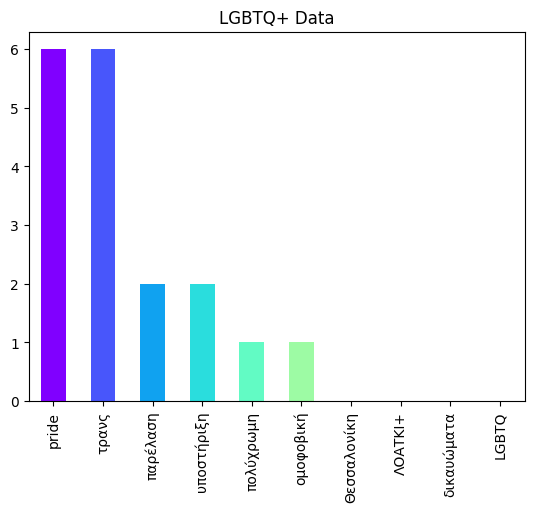

In [17]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='bar' , color=plt.cm.rainbow(np.linspace(0, 1, len(results.columns))))
plt.title("LGBTQ+ Data")

# **TFIDF VECTORIZER GENERAL**

In [18]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(news247_df['full_text'])

In [19]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

00  000        06        10       103       11        12   13   14  \
0  0.000000  0.0  0.000000  0.000000  0.172359  0.00000  0.000000  0.0  0.0   
1  0.000000  0.0  0.000000  0.000000  0.000000  0.00000  0.055601  0.0  0.0   
2  0.000000  0.0  0.000000  0.088563  0.000000  0.00000  0.000000  0.0  0.0   
3  0.082182  0.0  0.060645  0.000000  0.000000  0.08958  0.000000  0.0  0.0   
4  0.000000  0.0  0.000000  0.000000  0.172359  0.00000  0.000000  0.0  0.0   

    15  ...  œáœÑœçœÄŒ∑œÉŒµ      œáœéœÅŒ±     œáœéœÅŒ±œÇ  œáœéœÅŒµœÇ      œáœéœÅŒø  œåŒΩŒøŒºŒ±  œåœáŒ∑ŒºŒ±  œçœàŒøœÇ  \
0  0.0  ...      0.0  0.000000  0.000000    0.0  0.000000    0.0    0.0   0.0   
1  0.0  ...      0.0  0.189559  0.064596    0.0  0.000000    0.0    0.0   0.0   
2  0.0  ...      0.0  0.000000  0.000000    0.0  0.000000    0.0    0.0   0.0   
3  0.0  ...      0.0  0.000000  0.000000    0.0  0.080642    0.0    0.0   0.0   
4  0.0  ...      0.0  0.000000  0.000000    0.0  0.000000    0.0    0.0   0.0   

        œéœÅŒ±  œéœÅŒµœÇ  
0  0.000000   0.0  
1  0.000000   0.0  
2  0.000000   0.0  
3  0.069997   0.0  
4  0.000000   0.0  

[5 rows x 500 columns]

**10 œÄœÅœéœÑŒµœÇ ŒªŒ≠ŒæŒµŒπœÇ ŒºŒµ œÑŒø œÖœàŒ∑ŒªœåœÑŒµœÅŒø Œ¨Œ∏œÅŒøŒπœÉŒºŒ±**

In [20]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(10)

news           15.606761
Œ¥œçŒø             9.163278
24              8.960418
œÄœÅœéœÑŒøŒπ          8.098230
google          8.065969
ŒµŒπŒ¥ŒÆœÉŒµŒπœÇ        8.065969
ŒºŒ¨Œ∏ŒµœÑŒµ          8.051277
Œ±Œ∫ŒøŒªŒøœÖŒ∏ŒÆœÉœÑŒµ     8.051277
œÉœçŒºœÜœâŒΩŒ±         7.501277
œÉŒ∑ŒºŒµŒØŒø          7.025136
dtype: float64

<Axes: >

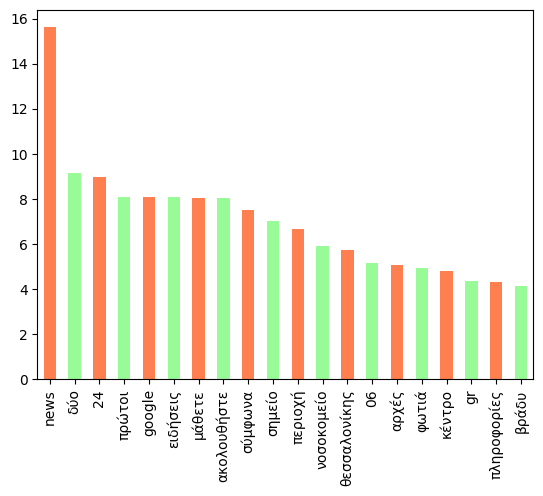

In [21]:
sum_words.sort_values(ascending = False).head(20).plot(kind='bar' , color=[ 'coral' , 'palegreen'])

# **TFIDF VECTORIZER : Œ•œÄœåŒ∏ŒµœÉŒ∑ ŒëŒΩŒ±œÉœÑŒ¨Œ∂ŒπŒ±**

In [23]:
vocabulary = ['Œ≥œÖŒΩŒ±ŒπŒ∫ŒøŒ∫œÑŒøŒΩŒØŒ±' , 'Œ±ŒΩŒ∏œÅœâœÄŒøŒ∫œÑŒøŒΩŒØŒ±' , 'ŒëŒΩŒ±œÉœÑŒ¨Œ∂ŒπŒ±', 'Œöœâ', 'ŒöœâœÇ', 'Œ≠Œ≥Œ∫ŒªŒ∑ŒºŒ±' , 'ŒµŒæŒ±œÜŒ¨ŒΩŒπœÉŒ∑' , 'Œ≠œÅŒµœÖŒΩŒ±' , 'Œ≠œÅŒµœÖŒΩŒµœÇ' , 'ŒºŒ∑œÑŒ≠œÅŒ±' , 'ŒØœáŒΩŒ∑' , 'ŒµŒ∏ŒµŒªœåŒΩœÑœÅŒπŒ±', 'Œ±ŒªœÖŒ∫Œ≠œÇ', 'œÄŒµœÅŒπŒøœáŒÆ', 'Œ∏œçŒºŒ±', 'Œ¥ŒøŒªŒøœÜŒøŒΩŒØŒ±', 'Œ¥ŒøŒªŒøœÜœåŒΩŒøœÇ', 'Œ≤ŒπŒ±œÉŒºœå', 'œÄœÑœéŒºŒ±', 'Œ∏Œ¨ŒΩŒ±œÑŒø' , 'Œ∏Œ¨ŒΩŒ±œÑŒøœÇ' ,'œÉŒøœÅœåœÇ', 'œÉŒ±Œ∫ŒøœçŒªŒµœÇ', '27œáœÅŒøŒΩŒ∑œÇ', '32œáœÅŒøŒΩŒøœÇ']

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=list(nlp.Defaults.stop_words), vocabulary=vocabulary)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(news247_df['full_text'])

In [25]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

Œ≥œÖŒΩŒ±ŒπŒ∫ŒøŒ∫œÑŒøŒΩŒØŒ±  Œ±ŒΩŒ∏œÅœâœÄŒøŒ∫œÑŒøŒΩŒØŒ±  ŒëŒΩŒ±œÉœÑŒ¨Œ∂ŒπŒ±   Œöœâ  ŒöœâœÇ  Œ≠Œ≥Œ∫ŒªŒ∑ŒºŒ±  ŒµŒæŒ±œÜŒ¨ŒΩŒπœÉŒ∑  \
0            0.0       0.000000        0.0  0.0  0.0      0.0        0.0   
1            0.0       0.000000        0.0  0.0  0.0      0.0        0.0   
2            0.0       0.000000        0.0  0.0  0.0      0.0        0.0   
3            0.0       0.164191        0.0  0.0  0.0      0.0        0.0   
4            0.0       0.000000        0.0  0.0  0.0      0.0        0.0   

   Œ≠œÅŒµœÖŒΩŒ±  Œ≠œÅŒµœÖŒΩŒµœÇ  ŒºŒ∑œÑŒ≠œÅŒ±  ...  Œ¥ŒøŒªŒøœÜŒøŒΩŒØŒ±  Œ¥ŒøŒªŒøœÜœåŒΩŒøœÇ    Œ≤ŒπŒ±œÉŒºœå     œÄœÑœéŒºŒ±  \
0     0.0  0.00000     0.0  ...   0.000000        0.0  0.000000  0.000000   
1     1.0  0.00000     0.0  ...   0.000000        0.0  0.000000  0.000000   
2     0.0  0.00000     0.0  ...   0.000000        0.0  0.000000  0.000000   
3     0.0  0.14785     0.0  ...   0.492574        0.0  0.151357  0.155198   
4     0.0  0.00000     0.0  ...   0.000000        0.0  0.000000  0.000000   

   Œ∏Œ¨ŒΩŒ±œÑŒø  Œ∏Œ¨ŒΩŒ±œÑŒøœÇ     œÉŒøœÅœåœÇ  œÉŒ±Œ∫ŒøœçŒªŒµœÇ  27œáœÅŒøŒΩŒ∑œÇ  32œáœÅŒøŒΩŒøœÇ  
0     0.0      0.0  0.000000       0.0  0.000000  0.000000  
1     0.0      0.0  0.000000       0.0  0.000000  0.000000  
2     0.0      0.0  0.000000       0.0  0.000000  0.000000  
3     0.0      0.0  0.351572       0.0  0.164191  0.605426  
4     0.0      0.0  0.000000       0.0  0.000000  0.000000  

[5 rows x 25 columns]

**Œ£œÖœáŒΩœåœÑŒ∑œÑŒ± ŒªŒ≠ŒæŒµœâŒΩ Œ∫Œ±Œπ œåœÅœâŒΩ œÉœáŒµœÑŒπŒ∫Œ¨ ŒºŒµ œÑŒ∑ŒΩ œÖœÄœåŒ∏ŒµœÉŒ∑ Œ¥ŒøŒªŒøœÜŒøŒΩŒØŒ±œÇ œÑŒ∑œÇ ŒëŒΩŒ±œÉœÑŒ¨Œ∂ŒπŒ±œÇ**

In [26]:
word_frequency = results[['Œ≥œÖŒΩŒ±ŒπŒ∫ŒøŒ∫œÑŒøŒΩŒØŒ±' , 'Œ±ŒΩŒ∏œÅœâœÄŒøŒ∫œÑŒøŒΩŒØŒ±' , 'ŒëŒΩŒ±œÉœÑŒ¨Œ∂ŒπŒ±', 'Œöœâ', 'ŒöœâœÇ', 'Œ≠Œ≥Œ∫ŒªŒ∑ŒºŒ±' , 'ŒµŒæŒ±œÜŒ¨ŒΩŒπœÉŒ∑' , 'Œ≠œÅŒµœÖŒΩŒ±' , 'Œ≠œÅŒµœÖŒΩŒµœÇ', 'ŒºŒ∑œÑŒ≠œÅŒ±' , 'ŒØœáŒΩŒ∑' , 'ŒµŒ∏ŒµŒªœåŒΩœÑœÅŒπŒ±', 'Œ±ŒªœÖŒ∫Œ≠œÇ', 'œÄŒµœÅŒπŒøœáŒÆ', 'Œ∏œçŒºŒ±', 'Œ¥ŒøŒªŒøœÜŒøŒΩŒØŒ±', 'Œ¥ŒøŒªŒøœÜœåŒΩŒøœÇ', 'Œ≤ŒπŒ±œÉŒºœå', 'œÄœÑœéŒºŒ±', 'Œ∏Œ¨ŒΩŒ±œÑŒø' , 'Œ∏Œ¨ŒΩŒ±œÑŒøœÇ' , 'œÉŒøœÅœåœÇ', 'œÉŒ±Œ∫ŒøœçŒªŒµœÇ', '27œáœÅŒøŒΩŒ∑œÇ', '32œáœÅŒøŒΩŒøœÇ']]

In [27]:
word_frequency_sum = word_frequency.sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Œ£œÖœáŒΩœåœÑŒ∑œÑŒ± œÑœâŒΩ ŒªŒ≠ŒæŒµœâŒΩ')

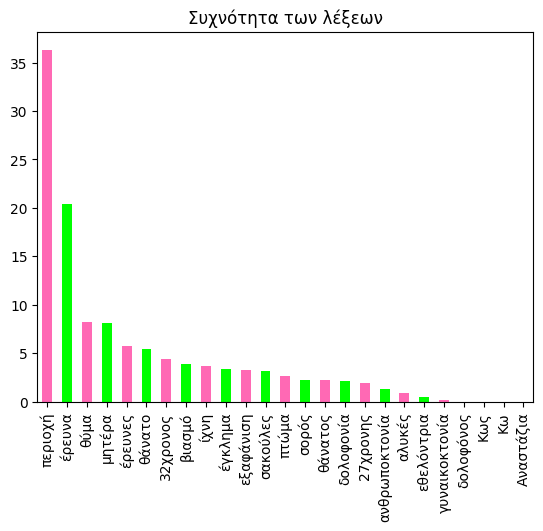

In [28]:
word_frequency_sum.plot(kind='bar' , color=[ 'hotpink' , 'lime'])
plt.title("Œ£œÖœáŒΩœåœÑŒ∑œÑŒ± œÑœâŒΩ ŒªŒ≠ŒæŒµœâŒΩ")

**ŒßœÅŒøŒΩŒπŒ∫ŒÆ œÉœÖœáŒΩœåœÑŒ∑œÑŒ± œÑœâŒΩ ŒªŒ≠ŒæŒµœâŒΩ**

In [29]:
df_datetime = news247_df.set_index(pd.to_datetime(news247_df['datetime']))

In [30]:
word_frequency_time = df_datetime['full_text'].str.contains('|'.join(vocabulary)).astype(int).resample('D').sum()

Text(0.5, 1.0, 'Œ£œÖœáŒΩœåœÑŒ∑œÑŒ± œÑœâŒΩ ŒªŒ≠ŒæŒµœâŒΩ Œ±ŒΩŒ¨ œáœÅŒøŒΩŒπŒ∫Œ¨ Œ¥ŒπŒ±œÉœÑŒÆŒºŒ±œÑŒ±')

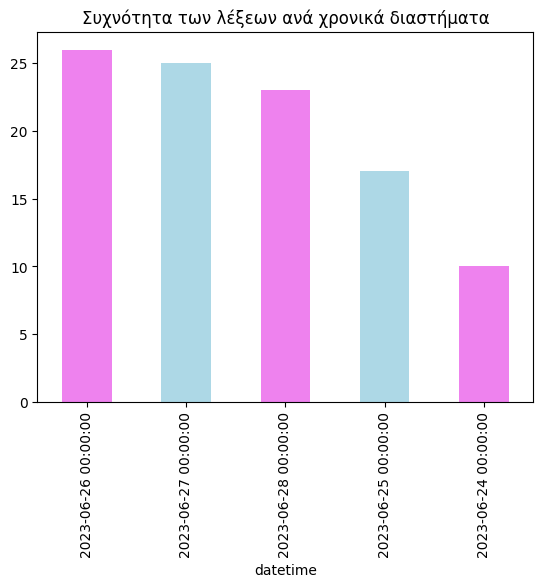

In [31]:
word_frequency_time.sort_values(ascending=False).plot(kind='bar' , color=[ 'violet' , 'lightblue'])
plt.title("Œ£œÖœáŒΩœåœÑŒ∑œÑŒ± œÑœâŒΩ ŒªŒ≠ŒæŒµœâŒΩ Œ±ŒΩŒ¨ œáœÅŒøŒΩŒπŒ∫Œ¨ Œ¥ŒπŒ±œÉœÑŒÆŒºŒ±œÑŒ±")

**Cosine Similarity**

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

In [33]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

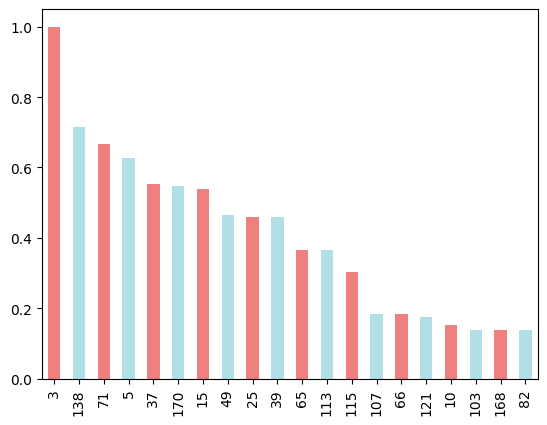

In [34]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar' , color=[ 'lightcoral' , 'powderblue'])

In [35]:
news247_df['full_text'].loc[3]

'Œ£œÑŒπœÇ œÜœÖŒªŒ±Œ∫Œ≠œÇ ŒöŒøœÅœÖŒ¥Œ±ŒªŒªŒøœç Œ±ŒΩŒ±ŒºŒ≠ŒΩŒµœÑŒ±Œπ ŒΩŒ± ŒºŒµœÑŒ±œÜŒµœÅŒ∏ŒµŒØ œÄŒµœÅŒØœÄŒøœÖ œÉœÑŒπœÇ 23:00 œÑŒø Œ≤œÅŒ¨Œ¥œÖ œÑŒ∑œÇ Œ§ŒµœÑŒ¨œÅœÑŒ∑œÇ (28/06) Œø 32œáœÅŒøŒΩŒøœÇ Œ±œÄœå œÑŒø ŒúœÄŒ±Œ≥Œ∫ŒªŒ±ŒΩœÑŒ≠œÇ, Œø ŒøœÄŒøŒØŒøœÇ Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒµŒØœÑŒ±Œπ Œ≥ŒπŒ± œÑŒ∑ Œ¥ŒøŒªŒøœÜŒøŒΩŒØŒ± œÑŒ∑œÇ 27œáœÅŒøŒΩŒ∑œÇ ŒëŒΩŒ±œÉœÑŒ¨Œ∂ŒπŒ± œÉœÑŒ∑ŒΩ Œöœâ. ŒåœÄœâœÇ ŒºŒµœÑŒ±Œ¥ŒØŒ¥ŒµŒπ Œ∑ ŒïŒ°Œ§, Œø ŒØŒ¥ŒπŒøœÇ Œ≠œáŒµŒπ Œ±œÅŒΩŒ∑Œ∏ŒµŒØ œÑŒπœÇ Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒµœÇ Œ≥ŒπŒ± Œ±œÅœÄŒ±Œ≥ŒÆ, Œ≤ŒπŒ±œÉŒºœå Œ∫Œ±Œπ Œ±ŒΩŒ∏œÅœâœÄŒøŒ∫œÑŒøŒΩŒØŒ± ŒµŒΩœéœÄŒπŒøŒΩ œÑŒ∑œÇ ŒëŒΩŒ±Œ∫œÅŒØœÑœÅŒπŒ±œÇ œÉœÑŒ∑ŒΩ Œöœâ, ŒµŒΩœé ŒºŒµœÑŒ¨ œÑŒ∑ŒΩ Œ±œÄŒøŒªŒøŒ≥ŒØŒ± œÑŒøœÖ, Œ∑ ŒëŒΩŒ±Œ∫œÅŒØœÑœÅŒπŒ± Œ¥ŒπŒ≠œÑŒ±ŒæŒµ œÑŒ∑ŒΩ œÄœÅŒøœÉœâœÅŒπŒΩŒÆ Œ∫œÅŒ¨œÑŒ∑œÉŒÆ œÑŒøœÖ. Œ£œçŒºœÜœâŒΩŒ± ŒºŒµ œÑŒπœÇ Œ¥Œ∑ŒªœéœÉŒµŒπœÇ œÑŒ∑œÇ Œ¥ŒπŒ∫Œ∑Œ≥œåœÅŒøœÖ œÑŒøœÖ 32œáœÅŒøŒΩŒøœÖ Œ∫. ŒëŒ∏Œ∑ŒΩŒ¨œÇ Œ¶ŒøœÖŒΩœÑœâœÑŒøœç, Œø 32œáœÅŒøŒΩŒøœÇ Œ¥ŒµŒΩ œÄŒ±œÅŒ±Œ¥Œ≠œáŒ∏Œ∑Œ∫Œµ Œ∫Œ±ŒºŒØŒ± Œ±œÄœå œÑŒπœÇ Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒµœÇ œÄŒøœÖ œÑŒøŒΩ Œ≤Œ±œÅŒ±ŒØŒΩŒøœÖŒΩ, œÄŒ±œÅŒ¨ œÑŒπœÇ ŒµœÄŒ

In [36]:
news247_df['full_text'].loc[5]

'ŒùŒ≠Œø Œ≤ŒØŒΩœÑŒµŒø - ŒΩœÑŒøŒ∫ŒøœÖŒºŒ≠ŒΩœÑŒø Œ≤ŒªŒ≠œÄŒµŒπ œÑŒø œÜœâœÇ œÑŒ∑œÇ Œ¥Œ∑ŒºŒøœÉŒπœåœÑŒ∑œÑŒ±œÇ œÉœáŒµœÑŒπŒ∫Œ¨ ŒºŒµ œÑŒ∑ŒΩ Œ¥ŒøŒªŒøœÜŒøŒΩŒØŒ± œÑŒ∑œÇ ŒëŒΩŒ±œÉœÑŒ¨Œ∂ŒπŒ± œÉœÑŒ∑ŒΩ Œöœâ. Œü 32œáœÅŒøŒΩŒøœÇ Œ±œÄœå œÑŒø ŒúœÄŒ±Œ≥Œ∫ŒªŒ±ŒΩœÑŒ≠œÇ Œ∫Œ±œÑŒ±Œ≥œÅŒ¨œÜŒµœÑŒ±Œπ Œ±œÄœå Œ∫Œ¨ŒºŒµœÅŒ± Œ±œÉœÜŒ±ŒªŒµŒØŒ±œÇ Œ≥ŒµŒπœÑŒøŒΩŒπŒ∫Œøœç œÑŒøœÖ œÉœÄŒπœÑŒπŒøœç ŒΩŒ± Œ∫Œ±œÑŒµœÖŒ∏œçŒΩŒµœÑŒ±Œπ ŒºŒµ œÑŒ± œÄœåŒ¥ŒπŒ± œÄœÅŒøœÇ œÑŒø œÉŒ∑ŒºŒµŒØŒø œÑŒ∑œÇ Œ¥ŒøŒªŒøœÜŒøŒΩŒØŒ±œÇ.  Œ†ŒµœÅŒØœÄŒøœÖ 11 ŒªŒµœÄœÑŒ¨ ŒºŒµœÑŒ¨, œåœÄœâœÇ Œ±ŒΩŒ±œÜŒ≠œÅŒµŒπ œÑŒø MEGA, ŒµœÄŒπœÉœÑœÅŒ≠œÜŒµŒπ œÄŒµœÅŒΩœéŒΩœÑŒ±œÇ Œ±œÄœå œÑŒøŒΩ ŒØŒ¥ŒπŒø Œ¥œÅœåŒºŒø. ŒîŒµŒØœáŒΩŒµŒπ Œ±ŒΩŒÆœÉœÖœáŒøœÇ Œ∫Œ±Œπ œÉœÖŒΩŒµœáœéœÇ ŒºŒπŒªŒ¨ŒµŒπ œÉœÑŒø Œ∫ŒπŒΩŒ∑œÑœå œÑŒøœÖ.  ŒüŒπ ŒëœÅœáŒ≠œÇ ŒµŒ∫œÑŒπŒºŒøœçŒΩ œåœÑŒπ œÄŒÆŒ≥Œ±ŒπŒΩŒµ ŒΩŒ± ŒµŒªŒ≠Œ≥ŒæŒµŒπ Œ±ŒΩ Œ∑ œÉŒøœÅœåœÇ œÑŒ∑œÇ Œ¨œÑœÖœáŒ∑œÇ Œ∫ŒøœÄŒ≠ŒªŒ±œÇ œÄŒ±œÅŒ≠ŒºŒµŒΩŒµ Œ∏Œ±ŒºŒºŒ≠ŒΩŒ∑ œÉœÑŒøŒΩ Œ∏Œ¨ŒºŒΩŒø œÉœÑŒπœÇ ŒëŒªœÖŒ∫Œ≠œÇ, ŒµŒ∫ŒµŒØ œåœÄŒøœÖ œÑŒ∑ŒΩ ŒµŒØœáŒµ Œ∫œÅœçœàŒµŒπ Œø ŒØŒ¥ŒπŒøœÇ œÑŒø Œ≤œÅŒ¨Œ¥œÖ œÑŒ∑œÇ 12Œ∑œÇ 

**Heatmap**

In [37]:
arr = cosine_similarity(tfidf_matrix_train[0:15], tfidf_matrix_train[0:15])

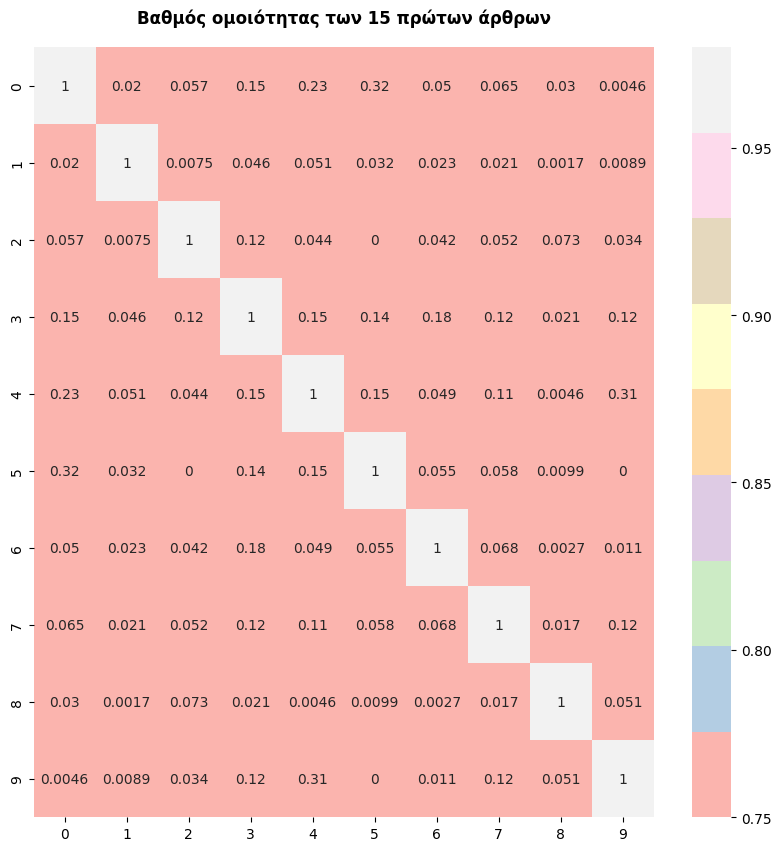

In [87]:
plt.figure(figsize=(10, 10))
plt.title('ŒíŒ±Œ∏ŒºœåœÇ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±œÇ œÑœâŒΩ 15 œÄœÅœéœÑœâŒΩ Œ¨œÅŒ∏œÅœâŒΩ', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="Pastel1")

plt.savefig('/content/drive/MyDrive/Colab Notebooks/AnastaziaHeatmap.png')

## **IN.GR VECTRORIZATION**

In [39]:
ingr_df = pd.read_csv('/content/drive/MyDrive/in.gr-MAY23.csv')
ingr_df

site                                                url        date  \
0     in.gr  https://www.in.gr/2023/05/01/world/oukrania-sy...  2023-05-01   
1     in.gr  https://www.in.gr/2023/05/01/greece/kairos-vro...  2023-05-01   
2     in.gr  https://www.in.gr/2023/05/01/sports/on-field/o...  2023-05-01   
3     in.gr  https://www.in.gr/2023/05/01/world/paragouai-n...  2023-05-01   
4     in.gr  https://www.in.gr/2023/05/01/world/tagip-ernto...  2023-05-01   
...     ...                                                ...         ...   
8365  in.gr  https://www.in.gr/2023/05/31/greece/oxia-emfan...  2023-05-31   
8366  in.gr  https://www.in.gr/2023/05/31/politics/kommata/...  2023-05-31   
8367  in.gr  https://www.in.gr/2023/05/31/greece/ergatiko-d...  2023-05-31   
8368  in.gr  https://www.in.gr/2023/05/31/life/moments/kori...  2023-05-31   
8369  in.gr  https://www.in.gr/2023/05/30/life/interviews/o...  2023-05-30   

         section                                              title  \
0        ŒöœåœÉŒºŒøœÇ   ŒüœÖŒ∫œÅŒ±ŒΩŒØŒ±: Œ£œÖŒΩŒ¨ŒΩœÑŒ∑œÉŒ∑ ŒºŒµ ŒùŒëŒ§Œü Œ≥ŒπŒ± œÑŒπœÇ Œ±ŒΩŒ¨Œ≥Œ∫ŒµœÇ œÑŒ∑...   
1        ŒïŒªŒªŒ¨Œ¥Œ±   ŒöŒ±ŒπœÅœåœÇ: ŒúŒµ Œ≤œÅŒøœáŒ≠œÇ Œ∫Œ±Œπ Œ∫Œ±œÑŒ±ŒπŒ≥ŒØŒ¥ŒµœÇ Œ∑ ŒµœÄŒπœÉœÑœÅŒøœÜŒÆ œÑ...   
2       On Field           Œü ŒºœçŒ∏ŒøœÇ œÑŒøœÖ ŒìŒøœÖŒ≠ŒºœÄŒªŒµœä Œ≠Œ≥ŒπŒΩŒµ ŒµŒ∫Œ±œÑœå œáœÅœåŒΩœâŒΩ   
3        ŒöœåœÉŒºŒøœÇ   Œ†Œ±œÅŒ±Œ≥ŒøœÖŒ¨Œ∑: ŒùŒ≠ŒøœÇ œÄœÅœåŒµŒ¥œÅŒøœÇ ŒµŒ∫ŒªŒ≠Œ≥ŒµœÑŒ±Œπ Œø Œ¥ŒµŒæŒπœåœÇ Œ£Œ±...   
4        ŒöœåœÉŒºŒøœÇ   Œ§Œ±Œ≥ŒØœÄ ŒïœÅŒΩœÑŒøŒ≥Œ¨ŒΩ: Œü œÜŒµœÅœåŒºŒµŒΩŒøœÇ œâœÇ Œ∑Œ≥Œ≠œÑŒ∑œÇ œÑŒøœÖ ŒôœÉŒªŒ±...   
...          ...                                                ...   
8365     ŒïŒªŒªŒ¨Œ¥Œ±   ŒüœáŒπŒ¨ ŒµŒºœÜŒ±ŒΩŒØœÉœÑŒ∑Œ∫Œµ œÉŒµ œÉœÄŒØœÑŒπ œÉœÑŒø Œ†Œ±ŒΩœåœÅŒ±ŒºŒ± ‚Äì ŒöŒªŒÆŒ∏Œ∑...   
8366    ŒöœåŒºŒºŒ±œÑŒ±   Live: Œó ŒµŒΩŒ∑ŒºŒ≠œÅœâœÉŒ∑ Œ±œÄœå œÑŒøŒΩ ŒµŒ∫œÄœÅœåœÉœâœÄŒø Œ§œçœÄŒøœÖ œÑŒ∑œÇ ...   
8367     ŒïŒªŒªŒ¨Œ¥Œ±   ŒïœÅŒ≥Œ±œÑŒπŒ∫œå Œ¥œÖœÉœÑœçœáŒ∑ŒºŒ± œÉœÑŒø Œ†Œ≠œÅŒ±ŒºŒ±: Œ£œÖŒ≥Œ∫ŒªŒøŒΩŒØŒ∂ŒµŒπ Œ∑ œÉ...   
8368     Moments  Œ§Œø Œ∫ŒøœÅŒØœÑœÉŒπ ŒºŒµ œÉœçŒΩŒ¥œÅŒøŒºŒø Down œÄŒøœÖ Œ≠Œ≥ŒπŒΩŒµ ŒµŒæœéœÜœÖŒªŒªŒø...   
8369  Interviews  Œü œÄŒøŒπŒ∑œÑŒÆœÇ ŒìŒπœéœÅŒ≥ŒøœÇ ŒúœÄŒªŒ¨ŒΩŒ±œÇ ŒºŒØŒªŒ∑œÉŒµ œÉœÑŒø in Œ≥ŒπŒ± œÑŒ∑...   

                author                                               text  
0           Œ£œçŒΩœÑŒ±ŒæŒ∑ ŒôŒù  ŒïŒΩ ŒºŒ≠œÉœâ œÄœÅŒøŒµœÑŒøŒπŒºŒ±œÉŒπœéŒΩ Œ≥ŒπŒ± œÑŒ∑ŒΩ œÄŒøŒªœÖœÉœÖŒ∂Œ∑œÑŒ∑ŒºŒ≠ŒΩŒ∑ Œø...  
1           Œ£œçŒΩœÑŒ±ŒæŒ∑ ŒôŒù  ŒúŒµ Œ¨œÉœÑŒ±œÑŒø Œ∫Œ±ŒπœÅœå Œ∏Œ± œÄœÅŒ±Œ≥ŒºŒ±œÑŒøœÄŒøŒπŒ∑Œ∏ŒµŒØ Œ∑ ŒµœÄŒπœÉœÑœÅŒøœÜŒÆ...  
2      ŒìŒπœéœÅŒ≥ŒøœÇ ŒùŒ±œÉŒºŒÆœÇ   ŒïŒØŒΩŒ±Œπ ŒµŒºŒ≤ŒªŒ∑ŒºŒ±œÑŒπŒ∫œå, œÉŒ∑ŒºŒµŒØŒø Œ±ŒΩŒ±œÜŒøœÅŒ¨œÇ, œÑŒø ŒºŒ≠œÅŒøœÇ œÄ...  
3           Œ£œçŒΩœÑŒ±ŒæŒ∑ ŒôŒù  Œü ŒøŒπŒ∫ŒøŒΩŒøŒºŒøŒªœåŒ≥ŒøœÇ Œ£Œ±ŒΩœÑŒπŒ¨Œ≥Œø Œ†Œ≠ŒΩŒπŒ±, Œø œÖœÄŒøœàŒÆœÜŒπŒøœÇ œÑŒø...  
4           Œ£œçŒΩœÑŒ±ŒæŒ∑ ŒôŒù  Œü ¬´œÜŒµœÅœåŒºŒµŒΩŒøœÇ œâœÇ Œ∑Œ≥Œ≠œÑŒ∑œÇ¬ª œÑŒ∑œÇ œÑŒ∂ŒπœáŒ±ŒΩœÑŒπœÉœÑŒπŒ∫ŒÆœÇ ŒøœÅŒ≥...  
...                ...                                                ...  
8365        Œ£œçŒΩœÑŒ±ŒæŒ∑ ŒôŒù  Œ†ŒªŒ∑Œ∏Œ±ŒØŒΩŒøœÖŒΩ œÑŒ± œÄŒµœÅŒπœÉœÑŒ±œÑŒπŒ∫Œ¨ ŒºŒµ œÑŒ∑ŒΩ ŒµŒºœÜŒ¨ŒΩŒπœÉŒ∑ ŒøœáŒπœé...  
8366        Œ£œçŒΩœÑŒ±ŒæŒ∑ ŒôŒù  ŒëœÖœÑŒÆ œÑŒ∑ŒΩ œéœÅŒ± œÄœÅŒ±Œ≥ŒºŒ±œÑŒøœÄŒøŒπŒµŒØœÑŒ±Œπ Œ∑ ŒµŒΩŒ∑ŒºŒ≠œÅœâœÉŒ∑ œÑœâŒΩ ...  
8367        Œ£œçŒΩœÑŒ±ŒæŒ∑ ŒôŒù  Œ£œÖŒ≥Œ∫ŒªŒøŒΩŒØŒ∂ŒµŒπ Œ∑ œÉœçŒ∂œÖŒ≥ŒøœÇ œÑŒøœÖ 47œáœÅŒøŒΩŒøœÖ ŒµœÅŒ≥Œ¨œÑŒ∑ œÄŒøœÖ ...  
8368        Œ£œçŒΩœÑŒ±ŒæŒ∑ ŒôŒù  Œó Ellie Goldstein ŒºŒØŒªŒ∑œÉŒµ œÉœÑŒø ¬´Œ†Œ¨ŒºŒµ ŒîŒ±ŒΩŒ¨Œ∑¬ª Œ≥ŒπŒ± ...  
8369        Œ£œçŒΩœÑŒ±ŒæŒ∑ ŒôŒù  Œó ŒúŒπŒ∫œÅŒÆ ŒÜœÅŒ∫œÑŒøœÇ Œ∫Œ±ŒªœâœÉŒøœÅŒØŒ∂ŒµŒπ œÉœÑŒ∑ŒΩ ŒµŒ∫Œ¥ŒøœÑŒπŒ∫ŒÆ œÑŒ∑œÇ Œø...  

[8370 rows x 7 columns]

In [40]:
cv = CountVectorizer()

In [41]:
ingr_df['text'] = ingr_df['text'].fillna('')
count_vector = cv.fit_transform(ingr_df['text'])

#mou vghke h pisth me ena xazo error pou evgaze h katw grammh kwdika!

In [42]:
count_vector = cv.fit_transform(ingr_df['text'])

In [41]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()
#edw crashare 2 fores to laptop mou giati posa data na anteksei! ( ‚Ä¢_ ‚Ä¢)

00  000  0000  0001  000Œ±Œ¥œÖŒΩŒ±œÑŒøŒπ7  000Œ±Œ¥œÖŒΩŒ±œÑŒøŒπŒ≥Œ∫ŒµŒΩŒ∫  000ŒµœÖœÅœé  000Œº  001  \
0   0    0     0     0             0                 0        0     0    0   
1   0    0     0     0             0                 0        0     0    0   
2   0    4     0     0             0                 0        0     0    0   
3   0    1     0     0             0                 0        0     0    0   
4   0    0     0     0             0                 0        0     0    0   

   002  ...  ùóïùóπùó≤ùòÇùòÄ  ùóòùóπùó∞ùóµùó≤ùó´ùóßùó•ùóî  ùóôùóúùó©ùóò  ùó°ùó®ùó†ùóïùóòùó•  ùó´ùóú  ùó±ùóÆùóªùóªùòÜ  ùó±ùó≤ùòÄ  ùóπùó∂ùòÄùòÅùó≤  \
0    0  ...      0          0     0       0   0      0    0      0   
1    0  ...      0          0     0       0   0      0    0      0   
2    0  ...      0          0     0       0   0      0    0      0   
3    0  ...      0          0     0       0   0      0    0      0   
4    0  ...      0          0     0       0   0      0    0      0   

   ùùüùùæùù∏ùùªùûàùùªùù¥ùùºùùæùòÄ  ùùÆùûÄùù∞ùù∏ùùæùòÄ  
0           0       0  
1           0       0  
2           0       0  
3           0       0  
4           0       0  

[5 rows x 154191 columns]

**Vectorizer ŒºŒµ stop words Œ∫Œ±Œπ œåœÅŒπŒ± œÉœÑŒπœÇ œÉœÖœáŒΩœåœÑŒ∑œÑŒµœÇ ŒµŒºœÜŒ¨ŒΩŒπœÉŒ∑œÇ œÑœâŒΩ ŒªŒ≠ŒæŒµœâŒΩ**


In [43]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [44]:
count_vector = cv.fit_transform(ingr_df['text'])

In [45]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

00  000  05  10  100  11  12  120  13  14  ...  œåœÅŒø  œåœÅŒøœÇ  œåœÅŒøœÖœÇ  œåœÜŒµŒªŒøœÇ  \
0   0    0   0   0    0   0   0    0   0   1  ...    0     0      0       0   
1   0    0   0   2    0   3   1    0   0   0  ...    0     0      0       0   
2   0    4   0   0    0   0   0    0   0   0  ...    0     0      0       0   
3   0    1   0   0    0   0   0    0   1   0  ...    0     0      0       0   
4   0    0   0   0    0   0   0    0   0   0  ...    0     0      0       0   

   œåœáŒ∑ŒºŒ±  œçœÄŒ±œÅŒæŒ∑  œçœàŒøœÇ  œçœàŒøœÖœÇ  œéœÅŒ±  œéœÅŒµœÇ  
0      0       0     0      0    0     0  
1      0       0     0      0    0     4  
2      0       0     0      0    0     0  
3      0       0     0      0    0     0  
4      0       0     0      0    0     0  

[5 rows x 3023 columns]

**Vectorizer ŒºŒµ stop words Œ∫Œ±Œπ max_features**



In [46]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(ingr_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

000  2023  the  Œ¥ŒπŒ±Œ≤Œ±œÉœÑŒµ  Œ¥œçŒø  ŒµŒØœÄŒµ  ŒµŒ∫ŒªŒøŒ≥Œ≠œÇ  ŒµŒªŒªŒ¨Œ¥Œ±  ŒµœÄŒπœÉŒ∑œÇ  ŒµœÖœÅœé  Œ∫Œ¨ŒΩŒµŒπ  \
0    0     0    0         1    0     0        0       0       1     0      0   
1    0     0    0         1    0     0        0       0       1     0      0   
2    4     0    0         0    3     0        0       0       0     0      0   
3    1     1    0         1    1     0        4       0       1     0      1   
4    0     0    0         1    0     1        0       0       1     0      0   

   Œ∫Œπ  Œ∫œÖŒ≤Œ≠œÅŒΩŒ∑œÉŒ∑  ŒΩŒ≠Œ±  œÉŒÆŒºŒµœÅŒ±  œÉœÖœÅŒπŒ∂Œ±  œÉœçŒºœÜœâŒΩŒ±  œÖœÄŒ¨œÅœáŒµŒπ  œáœÅœåŒΩŒπŒ±  œáœéœÅŒ±  
0   0          0    0       0       0        0        0       0     0  
1   0          0    0       1       0        1        0       0     4  
2   1          0    0       2       0        0        1       1     0  
3   2          0    0       0       0        0        0       2     3  
4   0          0    0       0       0        1        0       1     0

In [47]:
#cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\bŒ∫œÖŒ≤[Œ±-œâŒ¨-œé]*\b')
#count_vector = cv.fit_transform(ingr_df['text'])
#results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
#results.head()
    #edw ta tokens kai sto news247 mou evgazan errors
    #eite to diko sas token eite auto pou hthela na kanw egw : token_pattern = '\bŒ¥ŒøŒªŒøœÜŒøŒΩ[ŒØŒ±-Œ∑ŒºŒ≠ŒΩŒ∑]*\b

**Vectorizer ŒºŒµ ngrams**

In [48]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(ingr_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

000 ŒµœÖœÅœé  21Œ∑œÇ ŒºŒ±ŒêŒøœÖ  instagram Œ¥Œ∑ŒºŒøœÉŒØŒµœÖœÉŒ∑  of the  pic twitter  \
0         0           0                     0       0            0   
1         0           0                     0       0            0   
2         0           0                     0       0            0   
3         0           0                     0       0            0   
4         0           0                     0       0            0   

   twitter com  Œ±ŒªŒ≠ŒæŒ∑œÇ œÑœÉŒØœÄœÅŒ±œÇ  Œ±œÄŒµ ŒºœÄŒµ  Œ¥ŒµŒØœÑŒµ Œ¥Œ∑ŒºŒøœÉŒØŒµœÖœÉŒ∑  \
0            0               0        0                 0   
1            0               0        0                 0   
2            0               0        0                 0   
3            0               0        1                 0   
4            0               0        1                 0   

   Œ¥Œ∑ŒºŒøœÉŒØŒµœÖœÉŒ∑ instagram  Œ¥Œ∑ŒºŒøœÉŒØŒµœÖœÉŒ∑ Œ∫ŒøŒπŒΩŒøœÄŒøŒπŒÆŒ∏Œ∑Œ∫Œµ  Œ¥ŒπŒ±Œ≤Œ±œÉœÑŒµ ŒµœÄŒπœÉŒ∑œÇ  ŒµŒ∫Œ±œÑ ŒµœÖœÅœé  \
0                     0                         0                1          0   
1                     0                         0                1          0   
2                     0                         0                0          0   
3                     0                         0                1          0   
4                     0                         0                1          0   

   Œ∫ŒøŒπŒΩŒøœÄŒøŒπŒÆŒ∏Œ∑Œ∫Œµ œáœÅŒÆœÉœÑŒ∑  Œ∫œÖœÅŒπŒ¨Œ∫ŒøœÇ ŒºŒ∑œÑœÉŒøœÑŒ¨Œ∫Œ∑œÇ  ŒΩŒ≠Œ± Œ¥Œ∑ŒºŒøŒ∫œÅŒ±œÑŒØŒ±  \
0                     0                    0               0   
1                     0                    0               0   
2                     0                    0               0   
3                     0                    0               0   
4                     0                    0               0   

   ŒΩŒ≠Œ±œÇ Œ¥Œ∑ŒºŒøŒ∫œÅŒ±œÑŒØŒ±œÇ  œÄŒ∑Œ≥ŒÆ Œ±œÄŒµ  œÉœçŒºœÜœâŒΩŒ± œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒµœÇ  œÑŒ±Œ≥ŒØœÄ ŒµœÅŒΩœÑŒøŒ≥Œ¨ŒΩ  
0                 0         0                    0               0  
1                 0         0                    0               0  
2                 0         0                    0               0  
3                 0         1                    0               0  
4                 0         1                    0               1

Œ£œÖœáŒΩœåœÑŒµœÅŒµœÇ œÉŒµ œáœÅŒÆœÉŒ∑ ŒªŒ≠ŒæŒµŒπœÇ

<Axes: >

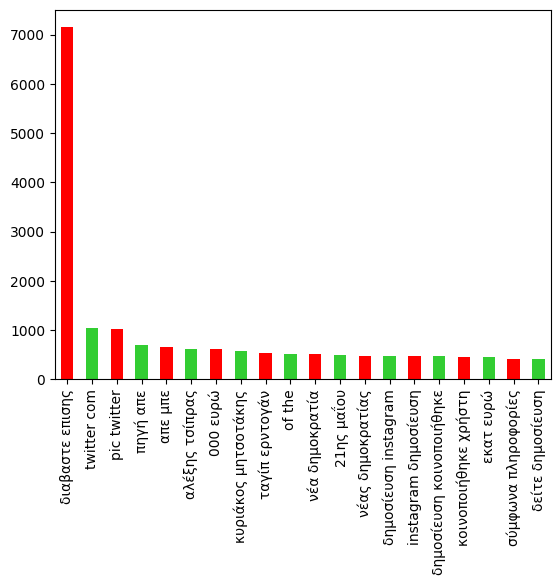

In [49]:
wordSum =  results.sum(axis =0)
wordSum.sort_values(ascending = False).head(20).plot(kind='bar' , color=[ 'r' , 'limegreen'])

Œ£œÖœáŒΩœåœÑŒµœÅŒµœÇ œÉŒµ œáœÅŒÆœÉŒ∑ ŒªŒ≠ŒæŒµŒπœÇ Œ±ŒΩŒ± Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒ±

In [50]:
section = "section"
textsss = "text"

In [51]:
cv = CountVectorizer(stop_words=list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)
count_vector = cv.fit_transform(ingr_df[section])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

In [52]:
results[section] = ingr_df[section]

In [53]:
alltogetherrr = results.groupby(section).sum()

In [54]:
words_to_sections = alltogetherrr.idxmax(axis=1)
words_to_sections.tail(20)

section
ŒöœÖŒ≤Œ≠œÅŒΩŒ∑œÉŒ∑                        agro
ŒöœåŒºŒºŒ±œÑŒ±                       Œ∫œåŒºŒºŒ±œÑŒ±
ŒöœåœÉŒºŒøœÇ                         Œ∫œåœÉŒºŒøœÇ
ŒúœÄŒ¨œÉŒ∫ŒµœÑ                       ŒºœÄŒ¨œÉŒ∫ŒµœÑ
ŒüŒπ ŒµŒπŒ¥ŒπŒ∫ŒøŒØ Œ±œÄŒ±ŒΩœÑŒøœçŒΩ              agro
ŒüŒπŒ∫ŒøŒΩŒøŒºŒØŒ±                   ŒøŒπŒ∫ŒøŒΩŒøŒºŒØŒ±
ŒüŒπŒ∫ŒøŒΩŒøŒºŒπŒ∫Œ≠œÇ ŒïŒπŒ¥ŒÆœÉŒµŒπœÇ         ŒµŒπŒ¥ŒÆœÉŒµŒπœÇ
Œ†ŒëŒôŒîŒô                            agro
Œ†Œ±ŒπŒ¥ŒØ                            agro
Œ†Œ±œÅŒ±œÉŒ∫ŒÆŒΩŒπŒø                       agro
Œ†ŒµœÅŒπŒ≤Œ¨ŒªŒªŒøŒΩ                       agro
Œ†ŒøŒ¥œåœÉœÜŒ±ŒπœÅŒø                 œÄŒøŒ¥œåœÉœÜŒ±ŒπœÅŒø
Œ†ŒøŒªŒπœÑŒπŒ∫Œ≠œÇ Œ£œÖŒΩŒµŒΩœÑŒµœçŒæŒµŒπœÇ           agro
Œ†ŒøŒªŒπœÑŒπŒ∫ŒÆ                     œÄŒøŒªŒπœÑŒπŒ∫ŒÆ
Œ†ŒøŒªŒπœÑŒπŒ∫ŒÆ ŒìœÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±        Œ≥œÅŒ±ŒºŒºŒ±œÑŒµŒØŒ±
Œ£œÄŒøœÅ                             œÉœÄŒøœÅ
Œ£œéŒºŒ± & Œ•Œ≥ŒµŒØŒ±                     agro
Œ§ŒóŒ£ ŒïŒ¶ŒóŒ£ ŒûŒïŒùŒüŒ•                   agro
Œ§ŒüŒ• ŒöŒ©Œ£Œ§Œë Œ£ŒöŒõŒëŒíŒïŒùŒôŒ§Œó             ag

## **TFIDF VECTORIZER**

In [55]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(ingr_df['text'])

In [56]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

00       000        10  100        11        12        13        14   15  \
0  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.134038  0.0   
1  0.0  0.000000  0.060637  0.0  0.108799  0.034526  0.000000  0.000000  0.0   
2  0.0  0.332289  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0   
3  0.0  0.057085  0.000000  0.0  0.000000  0.000000  0.067723  0.000000  0.0   
4  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0   

    16  ...  œáœÅŒµŒπŒ¨Œ∂ŒµœÑŒ±Œπ  œáœÅŒøŒΩŒπŒ¨    œáœÅœåŒΩŒπŒ±    œáœÅœåŒΩŒø      œáœéœÅŒ±     œáœéœÅŒ±œÇ  \
0  0.0  ...    0.151486     0.0  0.000000  0.00000  0.000000  0.000000   
1  0.0  ...    0.000000     0.0  0.000000  0.00000  0.115853  0.000000   
2  0.0  ...    0.000000     0.0  0.063988  0.08914  0.000000  0.000000   
3  0.0  ...    0.000000     0.0  0.087941  0.00000  0.157001  0.060563   
4  0.0  ...    0.000000     0.0  0.066187  0.00000  0.000000  0.000000   

      œáœéœÅŒµœÇ      œáœéœÅŒø  œéœÅŒ±      œéœÅŒµœÇ  
0  0.000000  0.000000  0.0  0.000000  
1  0.000000  0.000000  0.0  0.139387  
2  0.000000  0.096634  0.0  0.000000  
3  0.067377  0.000000  0.0  0.000000  
4  0.000000  0.000000  0.0  0.000000  

[5 rows x 500 columns]

ŒïŒöŒõŒüŒìŒïŒ£ ŒúŒëŒôŒüŒ• 2023

In [57]:
political_vocabulary = ['ŒµŒ∫ŒªŒøŒ≥Œ≠œÇ', 'ŒµŒ∫ŒªŒøŒ≥œéŒΩ', 'ŒΩŒ¥' , 'Œ±ŒªŒ≠ŒæŒ∑œÇ', 'ŒºŒ∑œÑœÉŒøœÑŒ¨Œ∫Œ∑œÇ', 'Œ∫Œ¨ŒªœÄŒµœÇ', 'Œ∫œåŒºŒºŒ±','Œ∫œåŒºŒºŒ±œÑŒ±' , 'Œ∫ŒøŒºŒºŒ¨œÑœâŒΩ', 'Œ≤ŒøœÖŒªŒÆ' , 'œàŒÆœÜŒøœÇ', '21Œ∑œÇ','Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±', 'ŒΩŒØŒ∫Œ∑', 'œÄŒ±œÉŒøŒ∫' ,'œÉœÖœÅŒπŒ∂Œ±', 'Œ∫Œ∫Œµ' , 'œÄŒøœÉŒøœÉœÑŒ¨']

In [58]:
word_frequency1 = results[['ŒµŒ∫ŒªŒøŒ≥Œ≠œÇ', 'ŒµŒ∫ŒªŒøŒ≥œéŒΩ','ŒΩŒ¥' , 'Œ±ŒªŒ≠ŒæŒ∑œÇ' , 'ŒºŒ∑œÑœÉŒøœÑŒ¨Œ∫Œ∑œÇ', 'Œ∫Œ¨ŒªœÄŒµœÇ', 'Œ∫œåŒºŒºŒ±', 'Œ∫œåŒºŒºŒ±œÑŒ±' ,'Œ∫ŒøŒºŒºŒ¨œÑœâŒΩ' , 'Œ≤ŒøœÖŒªŒÆ', '21Œ∑œÇ','Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±', 'ŒΩŒØŒ∫Œ∑', 'œÄŒ±œÉŒøŒ∫' ,'œÉœÖœÅŒπŒ∂Œ±', 'Œ∫Œ∫Œµ' , 'œÄŒøœÉŒøœÉœÑŒ¨']]

In [59]:
word_frequency1_sum = word_frequency1.sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Œ£œÖœáŒΩœåœÑŒ∑œÑŒ± œÑœâŒΩ ŒªŒ≠ŒæŒµœâŒΩ Œ≥ŒπŒ± œÑŒπœÇ ŒµŒ∫ŒªŒøŒ≥Œ≠œÇ 2023')

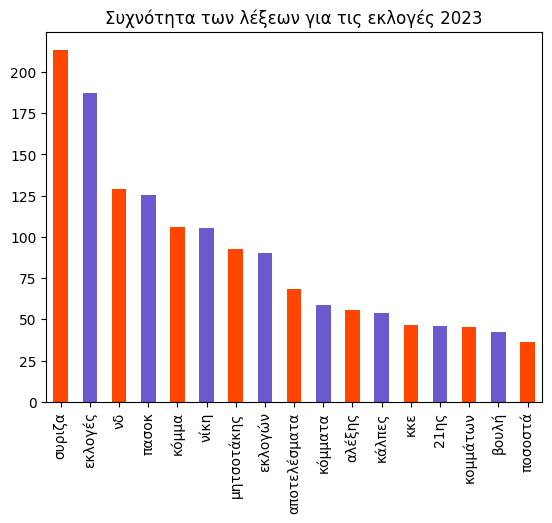

In [89]:
word_frequency1_sum.plot(kind='bar' , color=[ 'orangered' , 'slateblue'])
plt.title("Œ£œÖœáŒΩœåœÑŒ∑œÑŒ± œÑœâŒΩ ŒªŒ≠ŒæŒµœâŒΩ Œ≥ŒπŒ± œÑŒπœÇ ŒµŒ∫ŒªŒøŒ≥Œ≠œÇ 2023")

**Cosine Similarity**

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

In [62]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

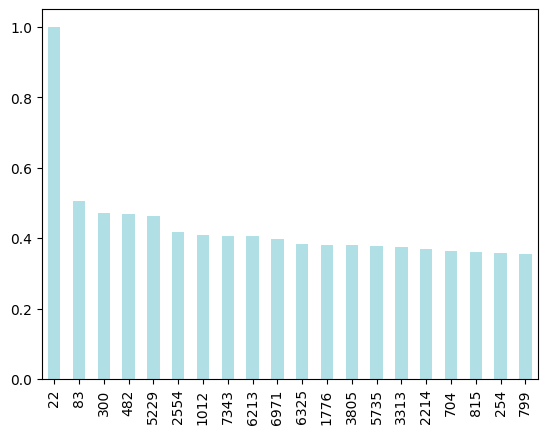

In [69]:
pd.DataFrame(arr).loc[22].sort_values(ascending = False).head(20).plot(kind = 'bar' , color=['powderblue'])

In [86]:
#hthela na dokimasw perissotera me cosine similarity alla eite to colab eite to laptop mou kapws duskoleuetai kai to afhsa

**Heatmap**

In [76]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

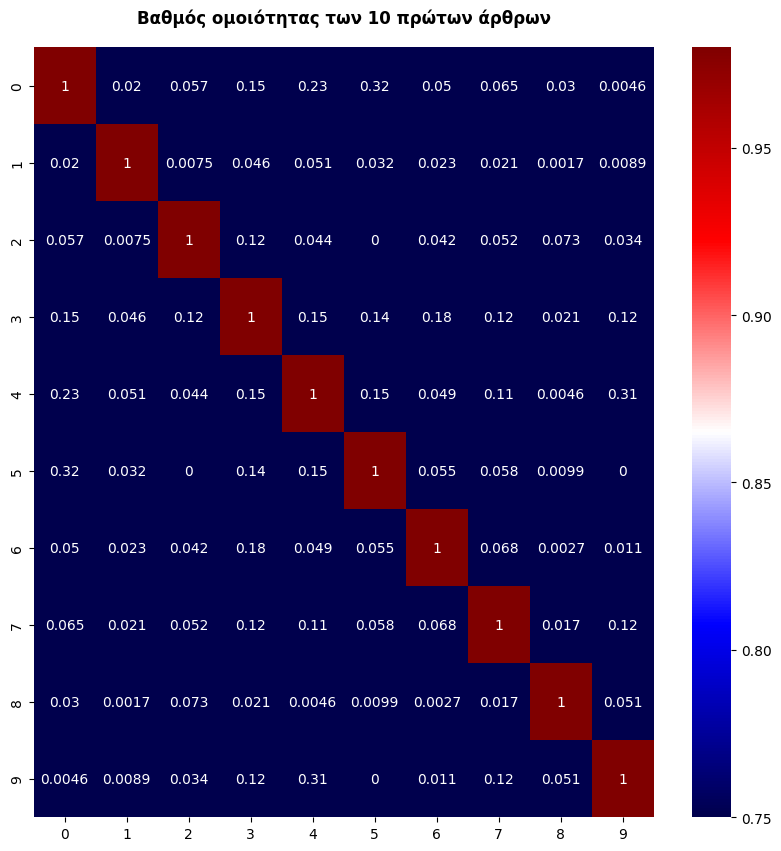

In [88]:
plt.figure(figsize=(10, 10))
plt.title('ŒíŒ±Œ∏ŒºœåœÇ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±œÇ œÑœâŒΩ 10 œÄœÅœéœÑœâŒΩ Œ¨œÅŒ∏œÅœâŒΩ', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="seismic")

plt.savefig('/content/drive/MyDrive/Colab Notebooks/ElectionsHeatmap>.png')

# **COSINE SIMILARITY BETWEEN NEWS247 % IN.GR**

In [90]:
news247_text = news247_df['full_text'].str.cat(sep = ' ')

In [91]:
ingr_text = ingr_df['text'].str.cat(sep = ' ')

In [92]:
two_sites_list = []
news247D = {'site' : 'news247.gr', 'text' : news247_text}
two_sites_list.append(news247D)
ingrD = {'site' : 'in.gr', 'text' : ingr_text}
two_sites_list.append(ingrD)
two_sites_df = pd.DataFrame(two_sites_list)
two_sites_df


site                                               text
0  news247.gr  Œó ŒµŒπŒ∫œåŒΩŒ± œÄŒøœÖ ŒµŒØŒ¥Œµ œÑŒø œÜœâœÇ œÑŒ∑œÇ Œ¥Œ∑ŒºŒøœÉŒπœåœÑŒ∑œÑŒ±œÇ, œÑŒø ...
1       in.gr  ŒïŒΩ ŒºŒ≠œÉœâ œÄœÅŒøŒµœÑŒøŒπŒºŒ±œÉŒπœéŒΩ Œ≥ŒπŒ± œÑŒ∑ŒΩ œÄŒøŒªœÖœÉœÖŒ∂Œ∑œÑŒ∑ŒºŒ≠ŒΩŒ∑ Œø...

In [93]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['text'])

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
print("cosine scores ==> ", arr)

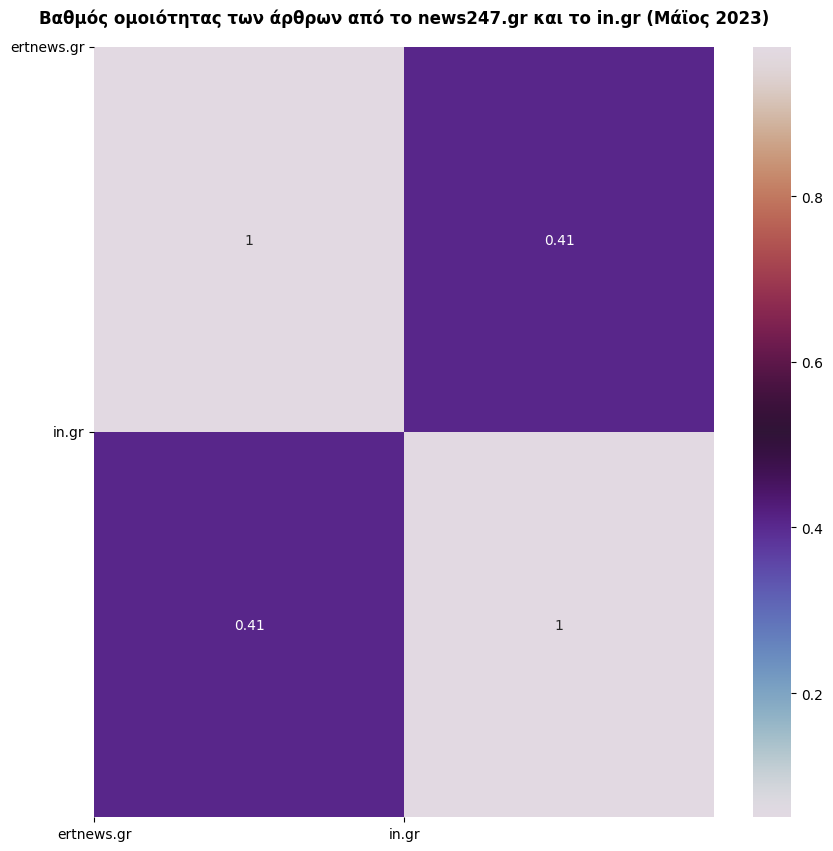

In [99]:
plt.figure(figsize=(10, 10))
plt.title('ŒíŒ±Œ∏ŒºœåœÇ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±œÇ œÑœâŒΩ Œ¨œÅŒ∏œÅœâŒΩ Œ±œÄœå œÑŒø news247.gr Œ∫Œ±Œπ œÑŒø in.gr (ŒúŒ¨œäŒøœÇ 2023)', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="twilight")
plt.xticks([0, 1], ['ertnews.gr', 'in.gr'])
plt.yticks([0, 1], ['ertnews.gr', 'in.gr'], rotation=0)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/news247_ingr_heatmap.png') # Œ±œÄŒøŒ∏Œ∑Œ∫Œµœçœâ œÑŒ∑ŒΩ ŒµŒπŒ∫œåŒΩŒ± œÑŒøœÖ Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ œÉœÑŒø drive